In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

In [200]:
df= pd.read_csv("crime_data.csv")

In [201]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [202]:
df=df.drop('Unnamed: 0', axis=1)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [204]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<AxesSubplot:>

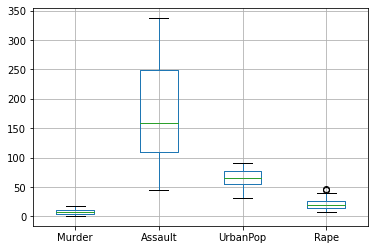

In [205]:
df.boxplot()

# Using Standardscalar


In [206]:
std_df= StandardScaler().fit_transform(df)

In [207]:
from sklearn.cluster import KMeans

In [208]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)  
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

C:\Users\STUDENT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


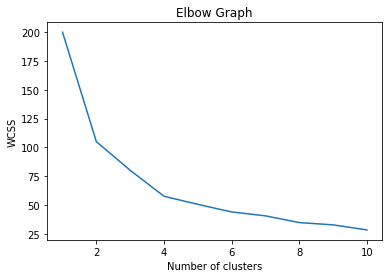

In [209]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [210]:
cluster=[2,3,4,5,6,7,8,9]
for num in cluster:
    kmeans= KMeans(n_clusters=num, random_state=0)
    clust_lables= kmeans.fit_predict(std_df)
    sil_score= silhouette_score(std_df, clust_lables)
    print(f"For {num} of clusters, silhoutte score is{sil_score}")

For 2 of clusters, silhoutte score is0.4084890326217641
For 3 of clusters, silhoutte score is0.3095091512791688
For 4 of clusters, silhoutte score is0.33968891433344395
For 5 of clusters, silhoutte score is0.30612803169146263
For 6 of clusters, silhoutte score is0.29910456843899946
For 7 of clusters, silhoutte score is0.23035904501364113
For 8 of clusters, silhoutte score is0.2732934287338534
For 9 of clusters, silhoutte score is0.2518939934580804


In [211]:
# So from above information, we can select the number of clusters = 4

In [212]:
std_cluster= KMeans(n_clusters=4, random_state=0)
std_labes= std_cluster.fit_predict(std_df)
std_labes= pd.DataFrame({"std_labes":std_labes})

In [213]:
df1=pd.concat([df,std_labes], axis=1)
df1.head()

,Murder,Assault,UrbanPop,Rape,std_labes
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1


<AxesSubplot:xlabel='std_labes', ylabel='count'>

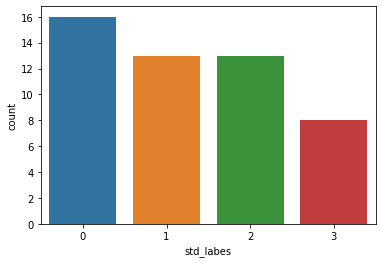

In [214]:
sns.countplot(x="std_labes", data=df1)

# Using Minmax scalar

In [215]:
minmax_df=MinMaxScaler().fit_transform(df)
minmax_df=pd.DataFrame(minmax_df)
minmax_df.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [216]:
wcss1=[]
for i in range (1,11):
    kmeans1= KMeans(n_clusters=i, random_state=0)
    kmeans1.fit(minmax_df)
    wcss1.append(kmeans1.inertia_)

C:\Users\STUDENT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


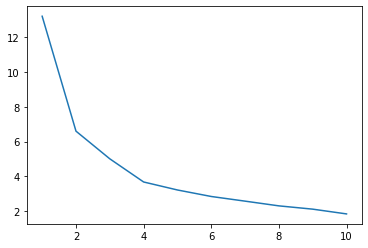

In [217]:
plt.plot(range(1,11), wcss1)


In [218]:
kmeans1=KMeans(n_clusters=4, random_state=0)
clust_minmax= kmeans1.fit_predict(minmax_df)
clust_minmax=pd.DataFrame({"clust_minmax" :clust_minmax})
clust_minmax.head()

,clust_minmax
0,2
1,0
2,0
3,2
4,0


In [219]:
df2= pd.concat([df,clust_minmax], axis=1)
df2.head()

,Murder,Assault,UrbanPop,Rape,clust_minmax
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0


<AxesSubplot:xlabel='clust_minmax', ylabel='count'>

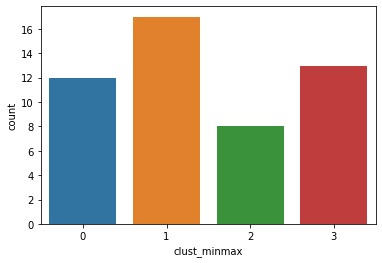

In [220]:
sns.countplot(x="clust_minmax", data=df2)

In [221]:
silscore=silhouette_score(minmax_df,kmeans1.fit_predict(minmax_df) )
silscore

0.34089035600743633

# using normalized data

In [222]:
norm_df= Normalizer().fit_transform(df)

In [223]:
kmeans2=KMeans(n_clusters=4)
clust_norm=kmeans2.fit_predict(norm_df) 
silscore1=silhouette_score(norm_df,clust_norm )
silscore1

0.46582251781897477

In [224]:
clust_norm = pd.DataFrame({"clust_norm": clust_norm})
df4= pd.concat([df,clust_norm], axis=1)

In [226]:
df4.head()

,Murder,Assault,UrbanPop,Rape,clust_norm
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,1


<AxesSubplot:xlabel='clust_norm', ylabel='count'>

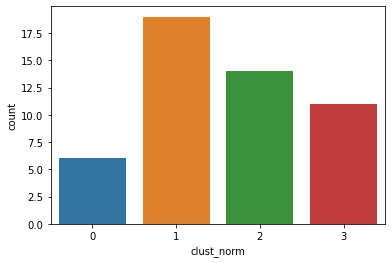

In [227]:
sns.countplot(x="clust_norm", data=df4)

# Normalized data gives highest score silhouette_score of 46% as compared to standardized and minmax scaled data